In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:

file_path = r'C:\Users\LYX\Desktop\onlineretail\online_retail.csv'

df = pd.read_csv(file_path)
df = df.iloc[:, :-1]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime format
df['Date'] = df['InvoiceDate'].dt.date  # Extract date
df['Time'] = df['InvoiceDate'].dt.time  # Extract time

# Drop the original InvoiceDate column
df = df.drop('InvoiceDate', axis=1)
df = df.dropna(subset=['Description'])
df = df[df['Description'].str.contains(r'^[A-Z0-9\s]+$')]

df = df[df['UnitPrice'] >= 0]
df.head(20)

C:\Users\LYX\AppData\Local\Temp\ipykernel_23816\1565068154.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time
0,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
2,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,2010-12-01,08:26:00
6,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
7,8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,2010-12-01,08:28:00
8,7,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,2010-12-01,08:28:00
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,2010-12-01,08:34:00
10,24,536368,22914,BLUE COAT RACK PARIS FASHION,3,4.95,13047.0,United Kingdom,2010-12-01,08:34:00
11,14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,4.25,13047.0,United Kingdom,2010-12-01,08:34:00
12,16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,9.95,13047.0,United Kingdom,2010-12-01,08:34:00


In [3]:
#df.to_csv('onlineSales.csv', index=False)

In [4]:
category=pd.DataFrame(df['Description'].unique(),columns=['Description'])
category

,Description
0,CREAM CUPID HEARTS COAT HANGER
1,KNITTED UNION FLAG HOT WATER BOTTLE
2,SET 7 BABUSHKA NESTING BOXES
3,WHITE METAL LANTERN
4,HAND WARMER RED POLKA DOT
...,...
3477,DOORKNOB CERAMIC IVORY
3478,MISELTOE HEART WREATH CREAM
3479,FILIGREE DIAMANTE CHAIN
3480,FLOWER FAIRY 5 SUMMER DRAW LINERS


In [5]:
most_recent_date = df.groupby('CustomerID')['Date'].max().reset_index()
most_recent_date.columns = ['CustomerID', 'MostRecentInvoiceDate']
most_recent_date['MostRecentInvoiceDate'] = pd.to_datetime(most_recent_date['MostRecentInvoiceDate'])


In [6]:
most_recent_date

,CustomerID,MostRecentInvoiceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4341,18280.0,2011-03-07
4342,18281.0,2011-06-12
4343,18282.0,2011-12-02
4344,18283.0,2011-12-06


In [7]:
target_date = pd.to_datetime('2012-01-01')


In [8]:
most_recent_date['Recency'] = (target_date - most_recent_date['MostRecentInvoiceDate']).dt.days
most_recent_date

,CustomerID,MostRecentInvoiceDate,Recency
0,12346.0,2011-01-18,348
1,12347.0,2011-12-07,25
2,12348.0,2011-09-25,98
3,12349.0,2011-11-21,41
4,12350.0,2011-02-02,333
...,...,...,...
4341,18280.0,2011-03-07,300
4342,18281.0,2011-06-12,203
4343,18282.0,2011-12-02,30
4344,18283.0,2011-12-06,26


In [9]:
unique_invoices_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
unique_invoices_per_customer.columns = ['CustomerID', 'Frequency']
unique_invoices_per_customer

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4341,18280.0,1
4342,18281.0,1
4343,18282.0,3
4344,18283.0,16


In [10]:
RFM_data = pd.merge(most_recent_date, unique_invoices_per_customer, on='CustomerID', how='left')
RFM_data

,CustomerID,MostRecentInvoiceDate,Recency,Frequency
0,12346.0,2011-01-18,348,2
1,12347.0,2011-12-07,25,7
2,12348.0,2011-09-25,98,4
3,12349.0,2011-11-21,41,1
4,12350.0,2011-02-02,333,1
...,...,...,...,...
4341,18280.0,2011-03-07,300,1
4342,18281.0,2011-06-12,203,1
4343,18282.0,2011-12-02,30,3
4344,18283.0,2011-12-06,26,16


In [11]:
df['TotalExpenditure'] = df['Quantity'] * df['UnitPrice']

# Calculate the total money spent by each customer
total_spent_per_customer = df.groupby('CustomerID')['TotalExpenditure'].sum().reset_index()
total_spent_per_customer.columns = ['CustomerID', 'Money']


In [12]:
RFM_data = pd.merge(RFM_data, total_spent_per_customer, on='CustomerID', how='left')
RFM_data

,CustomerID,MostRecentInvoiceDate,Recency,Frequency,Money
0,12346.0,2011-01-18,348,2,0.00
1,12347.0,2011-12-07,25,7,4169.45
2,12348.0,2011-09-25,98,4,1797.24
3,12349.0,2011-11-21,41,1,1626.25
4,12350.0,2011-02-02,333,1,316.70
...,...,...,...,...,...
4341,18280.0,2011-03-07,300,1,180.60
4342,18281.0,2011-06-12,203,1,80.82
4343,18282.0,2011-12-02,30,3,176.60
4344,18283.0,2011-12-06,26,16,1780.16


In [21]:
rfm = RFM_data[['Recency', 'Frequency', 'Money']]

# Step 3: Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

c:\Users\LYX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


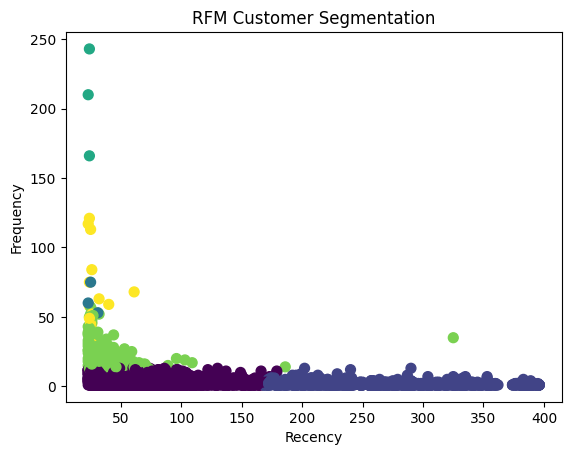

In [22]:


# Select the RFM features for segmentation
X = rfm_scaled

# Determine the number of clusters (K)
kmeans = KMeans(n_clusters=6, random_state=50)

# Fit K-means clustering on the RFM features
kmeans.fit(X)

# Add cluster labels to the original dataset
RFM_data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(RFM_data['Recency'], RFM_data['Frequency'], c=RFM_data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Customer Segmentation')
plt.show()


In [24]:
# Calculate cluster means for each RFM metric
cluster_info = RFM_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Money': 'mean',
    'CustomerID': 'count'  # count the number of customers in each cluster
}).reset_index()


cluster_info_sorted = cluster_info.sort_values('Recency', ascending=True)

# Display information about each cluster
print(cluster_info)


   Cluster     Recency   Frequency          Money  CustomerID
0        0   66.338190    3.856320    1076.964325        2951
1        1  272.228545    1.786381     420.181493        1072
2        2   26.333333   62.666667  227505.403333           3
3        3   23.666667  206.333333   61274.950000           3
4        4   36.137124   20.876254    7040.187659         299
5        5   29.833333   61.333333   52083.781667          18


In [32]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5183340094031031


##### Cluster Analysis and Suggested Names
Cluster 0: Key Retention Customer, Moderate purchasing frequency and decent spending indicate loyalty.


Cluster 1: Churn Customers, High recency suggests inactivity; low frequency and spend indicate disengagement.


Cluster 2: High-Value Customers, Extremely high frequency and monetary value signify top-tier customers.


Cluster 3: Loyal Customers, Exceptional frequency and significant spending reflect a highly engaged customer base.


Cluster 4: Moderate Spenders, Customers spend moderately and purchase reasonably frequently, indicating growth potential.

Cluster 5: Engaged Customers, Actively engaged customers with decent purchasing frequency and spending.

In [25]:


# Dictionary mapping clusters to customer labels
customer_labels = {
    3: 'Loyal Customers',
    1: 'Churn Customers',
    2: 'High-Value Customers',
    4: 'Moderate Spenders',
    5: 'Engaged Customers',
    0: 'Key Retention Customer'
}

# Add a new column 'CustomerLabel' based on the cluster information
RFM_data['CustomerSegment'] = RFM_data['Cluster'].map(customer_labels)

# Display the DataFrame with the added 'CustomerLabel' column
RFM_data[['CustomerID', 'Cluster', 'CustomerSegment']]
RFM_data

,CustomerID,MostRecentInvoiceDate,Recency,Frequency,Money,Cluster,CustomerSegment
0,12346.0,2011-01-18,348,2,0.00,1,Churn Customers
1,12347.0,2011-12-07,25,7,4169.45,0,Key Retention Customer
2,12348.0,2011-09-25,98,4,1797.24,0,Key Retention Customer
3,12349.0,2011-11-21,41,1,1626.25,0,Key Retention Customer
4,12350.0,2011-02-02,333,1,316.70,1,Churn Customers
...,...,...,...,...,...,...,...
4341,18280.0,2011-03-07,300,1,180.60,1,Churn Customers
4342,18281.0,2011-06-12,203,1,80.82,1,Churn Customers
4343,18282.0,2011-12-02,30,3,176.60,0,Key Retention Customer
4344,18283.0,2011-12-06,26,16,1780.16,4,Moderate Spenders


In [26]:
customer_segments = RFM_data[['CustomerID', 'CustomerSegment']]


In [27]:
customer_segments

,CustomerID,CustomerSegment
0,12346.0,Churn Customers
1,12347.0,Key Retention Customer
2,12348.0,Key Retention Customer
3,12349.0,Key Retention Customer
4,12350.0,Churn Customers
...,...,...
4341,18280.0,Churn Customers
4342,18281.0,Churn Customers
4343,18282.0,Key Retention Customer
4344,18283.0,Moderate Spenders


In [19]:
customer_segments.to_csv('customer_segments.csv', index=False)

c:\Users\LYX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LYX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LYX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LYX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

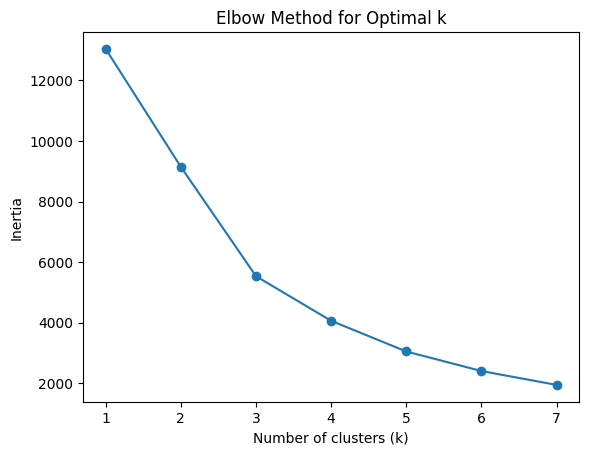

In [30]:
inertia = []
k_values = range(1, 8)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\LYX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


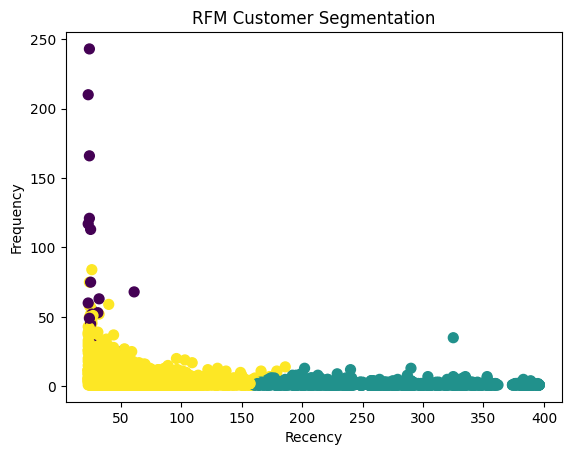

In [33]:
kmeans = KMeans(n_clusters=3, random_state=50)

# Fit K-means clustering on the RFM features
kmeans.fit(X)

# Add cluster labels to the original dataset
RFM_data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(RFM_data['Recency'], RFM_data['Frequency'], c=RFM_data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Customer Segmentation')
plt.show()


In [34]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5848779742379716
